# Author : Owen Nda Diche

## Predictive modeling of customer bookings
### Project Overview
This project aims to predict whether a customer will complete a flight booking based on their booking behaviour and travel-related attributes.
Using historical customer data, a machine learning model is developed to identify key factors influencing booking decisions and to support data-driven marketing strategies.

### Objectives
- To build a predictive model that classifies whether a customer will complete a booking
- To evaluate the performance of the model using standard classification metrics
- To identify the most important factors influencing booking behaviour
- To translate model results into business insights

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 914 entries, num_passengers to booking_origin_Vietnam
dtypes: bool(904), float64(1), int64(9)
memory usage: 46.9 MB


In [21]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [22]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [23]:
df["flight_day"].unique()

array([nan])

In [24]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,0.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,NaN,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,NaN,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,NaN,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,NaN,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,NaN,1.000000,1.000000,1.000000,9.500000,1.000000


# Cleaning & Preparing Data

In [10]:
# Drop irrelevant columns
df = df.drop(columns=["CustomerID"], errors="ignore")

# Handle missing values
df = df.fillna(0)

# Encode categoricals
df = pd.get_dummies(df, drop_first=True)

# Training a Machine Learning Model
## Model Used : Random Forest

### Reasons: 
- Handles non-linear data well
- Easy to interpret
- Built-in feature importance
- Strong for business datasets

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df.drop("booking_complete", axis=1)
y = df["booking_complete"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

# Evaluating Model

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.855
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.54      0.14      0.22      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.56      0.57     10000
weighted avg       0.82      0.85      0.82     10000



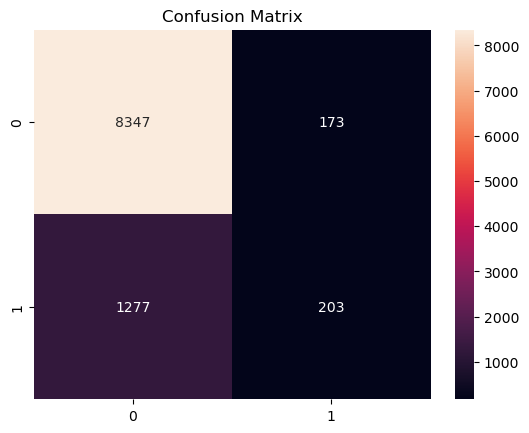

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance

In [18]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)

purchase_lead               0.157603
flight_hour                 0.128003
length_of_stay              0.114462
flight_day                  0.090240
num_passengers              0.046833
flight_duration             0.034738
booking_origin_Malaysia     0.028635
wants_in_flight_meals       0.022350
booking_origin_Australia    0.019355
wants_preferred_seat        0.017998
dtype: float64

<Axes: >

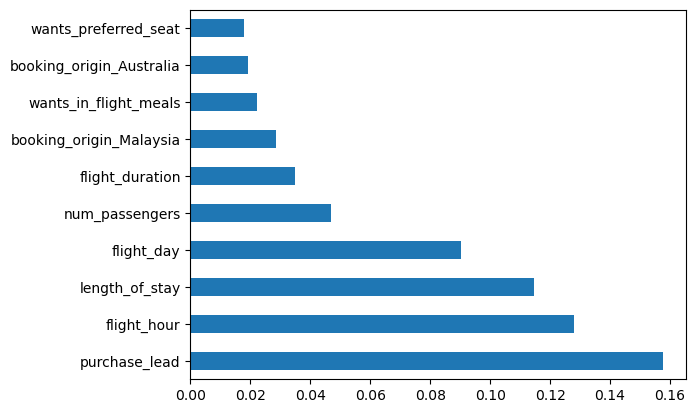

In [19]:
importances.sort_values(ascending=False).head(10).plot(kind="barh")

## Model Evaluation
The model was evaluated using:
- Accuracy
- Precision and Recall
- Confusion Matrix

Results:
- Accuracy: 85.5%
- The model shows strong performance in distinguishing between booking and non-booking customers.

This indicates that the dataset contains meaningful predictive patterns.

## Feature Importance
### Feature importance analysis revealed that the most influential variables were:
- Purchase lead time
- Previous booking behaviour
- Travel-related attributes (route, duration)
- Customer preference indicators (baggage, meals, seat selection)

These results suggest that customer behaviour and planning habits play a significant role in booking decisions.

## Business Insights
- Customers who plan trips earlier are more likely to complete bookings
- Engagement indicators strongly influence conversion likelihood
- Booking behaviour can be predicted with reasonable accuracy using historical data

### This model could support:
- Targeted marketing campaigns
- Personalised offers
- Improved conversion strategies

### Conclusion

This project demonstrates how machine learning can be used to predict customer booking behaviour and extract actionable business insights.
The model achieved strong performance and highlighted key behavioural drivers that can support commercial decision-making.